# Kaggle-suicides-rates-overview-dataset

## 2019-02-27

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [148]:
original=pd.read_csv('./master.csv')

In [149]:
print(original.head())
print(original.tail())
print(original.shape)
print(original.dtypes)
print(original.isnull().sum())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [150]:
x=original['country'].unique()
for i in x:
    if original.loc[original['country']==i,'HDI for year'].isnull().sum()>0:
        original.loc[original['country']==i,'HDI for year']= \
        original.loc[original['country']==i,'HDI for year'].fillna(
        np.mean(original.loc[original['country']==i,'HDI for year']))
    else:
        pass

In [151]:
original.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          1486
 gdp_for_year ($)        0
gdp_per_capita ($)       0
generation               0
dtype: int64

In [152]:
original=original.fillna(np.mean(original['HDI for year']))
original.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [153]:
original.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [154]:
for i in range(original.index.shape[0]):
    original.loc[i,' gdp_for_year ($) ']= \
    re.sub('\D','',str(original.loc[i,' gdp_for_year ($) ']))

In [155]:
original.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2156624900,796,Boomers


In [156]:
original[' gdp_for_year ($) ']=original[' gdp_for_year ($) '].astype('int64')

In [157]:
print(original.dtypes)
print(original.isnull().sum())

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object
country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


## Visualization-by year

In [158]:
yeargroup=original.groupby(by='year')
yearsum=yeargroup.sum()
yearsum.tail()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,,,,,,
2012,230160,1912812088,11101.91,780.909749,676502580180480,26058300
2013,223199,1890161710,10663.64,774.753749,685050211812900,26911368
2014,222984,1912057309,10306.73,755.541749,672496725417372,25665252
2015,203640,1774657932,8253.99,582.969202,580433884300596,19516008
2016,15603,132101896,2147.39,127.271176,29252100111210,4106420


In [159]:
yearSum=yearsum.loc[:,['suicides_no','population']]
yearSum.drop(index=[2015,2016],inplace=True)

In [160]:
yearSum.tail()

,suicides_no,population
year,,
2010,238702,1997297329
2011,236484,1993362332
2012,230160,1912812088
2013,223199,1890161710
2014,222984,1912057309


In [161]:
yearSum['suicides_rate(%)']=round((yearSum['suicides_no']/yearsum['population'])*100,4)
yearSum.index=yearSum.index.astype('str')
yearSum.tail()

,suicides_no,population,suicides_rate(%)
year,,,
2010,238702,1997297329,0.0120
2011,236484,1993362332,0.0119
2012,230160,1912812088,0.0120
2013,223199,1890161710,0.0118
2014,222984,1912057309,0.0117


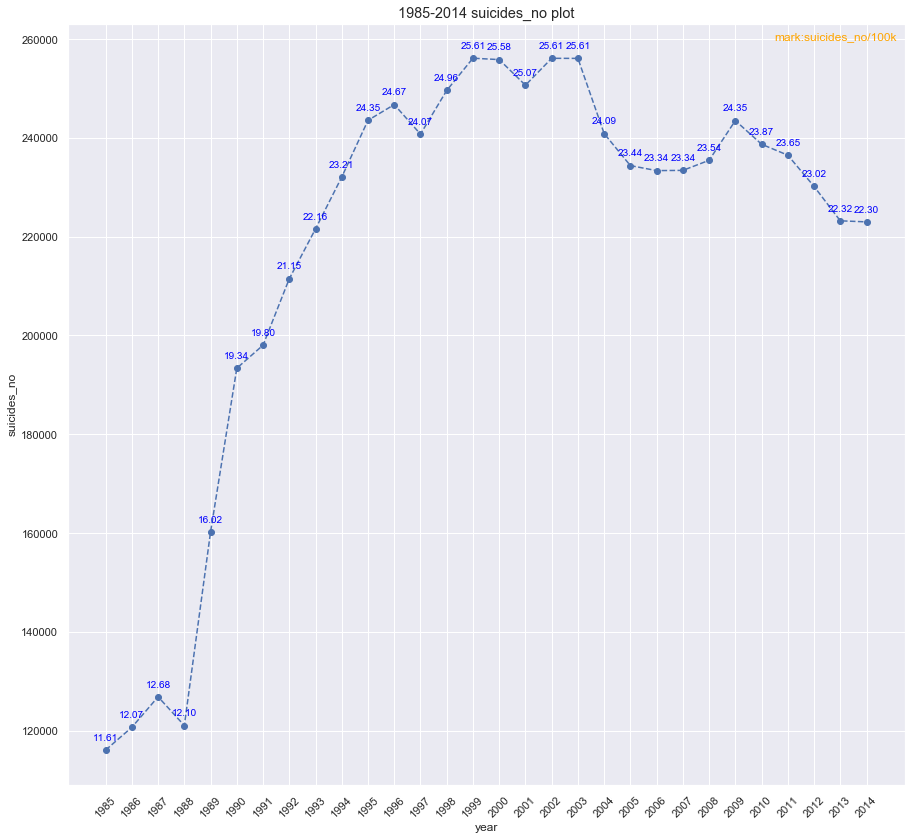

In [162]:
sns.set()
p0=yearSum.loc[:,'suicides_no'].plot(figsize=(15,14),linestyle='--',marker='o')
p0.get_figure()
plt.title(r'1985-2014 suicides_no plot',fontsize='large')
plt.text(25.5,260000,'mark:suicides_no/100k',color='orange')
plt.ylabel('suicides_no')
plt.xticks(range(yearSum.index.shape[0]),yearSum.index,rotation=45)
x=np.arange(yearSum.index.shape[0])
y=np.array(yearSum.loc[:,'suicides_no'])
for i,j in zip(x,y):
    plt.text(i,j+2000,'%1.2f'%round(j/10000,2),ha='center',color='blue',fontsize='small')
plt.savefig('./charts/total_by_year_plot.png')
plt.show()

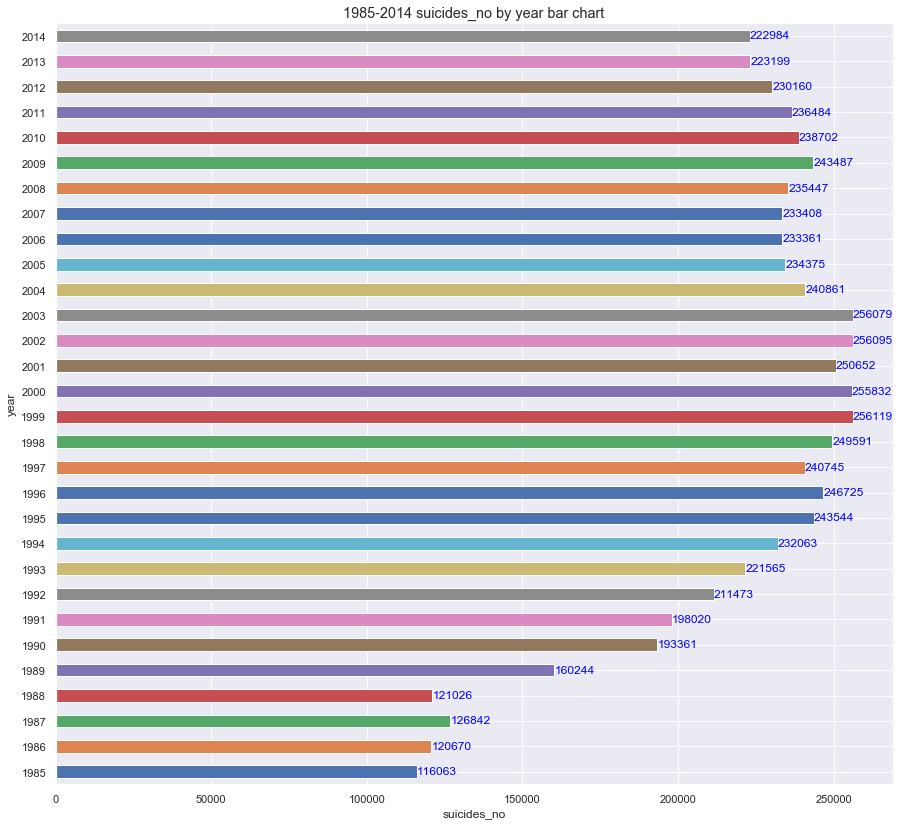

In [163]:
sns.set()
p1=yearSum.loc[:,'suicides_no'].plot.barh(figsize=(15,14))
p1.get_figure()
plt.title(r'1985-2014 suicides_no by year bar chart',fontsize='large')
plt.xlabel('suicides_no')
plt.yticks(range(yearSum.index.shape[0]),yearSum.index)
x=np.arange(yearSum.index.shape[0])
y=np.array(yearSum.loc[:,'suicides_no'])
for i,j in zip(x,y):
    plt.text(j+6500,i-0.1,'%d'%j,ha='center',color='blue')
else:
    pass
plt.savefig('./charts/total_by_year_bar.png')
plt.show()

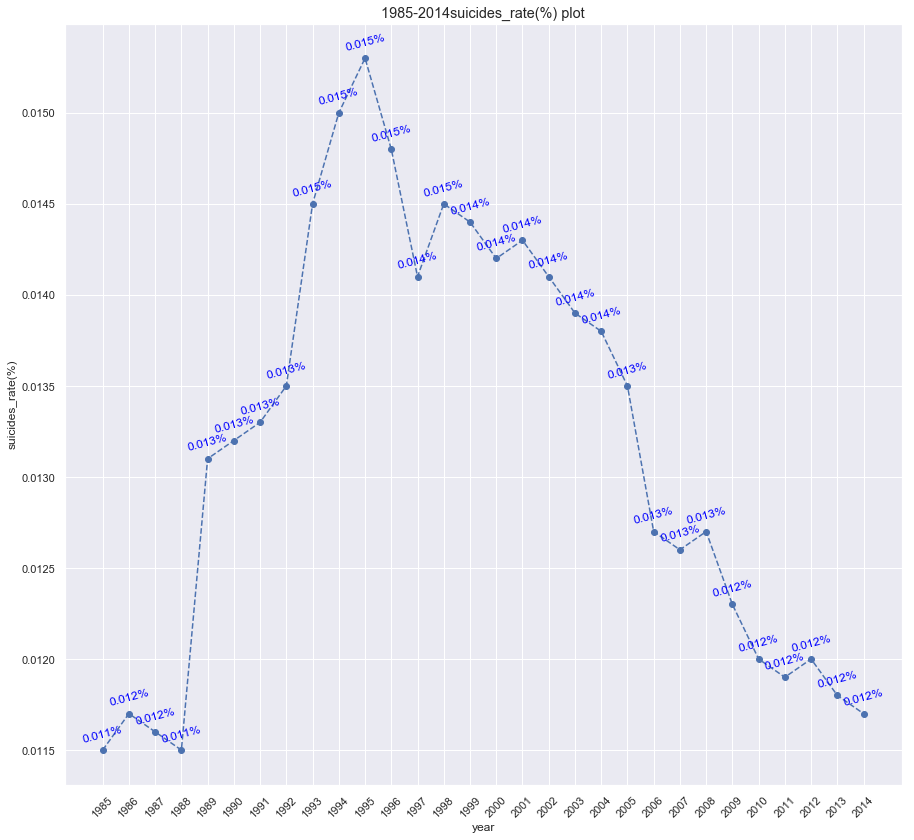

In [164]:
z1=yearSum['suicides_rate(%)'].plot(figsize=(15,14),linestyle='--',marker='o')
z1.get_figure()
plt.title(r'1985-2014suicides_rate(%) plot',fontsize='large')
plt.xticks(range(yearSum.index.shape[0]),yearSum.index.astype('str'),rotation=45)
plt.ylabel('suicides_rate(%)')
x=np.arange(yearSum.index.shape[0])
y=np.array(yearSum['suicides_rate(%)'])
for i,j in zip(x,y):
    plt.text(i,j+0.0001,'%1.3f%%'%j,ha='center',rotation=15,color='blue')
else:
    pass
plt.savefig('./charts/suicides_rate_plot.png')
plt.show()

## Visualization-by sex

In [165]:
sexPivot=pd.pivot_table(original,index='year',columns='sex',values='suicides_no',aggfunc=np.sum)
sexPivot.drop(index=[2015,2016],inplace=True)

In [166]:
sexPivot.index=sexPivot.index.astype('str')
sexPivot.tail()

sex,female,male
year,,
2010,54222,184480
2011,54616,181868
2012,53011,177149
2013,51459,171740
2014,51556,171428


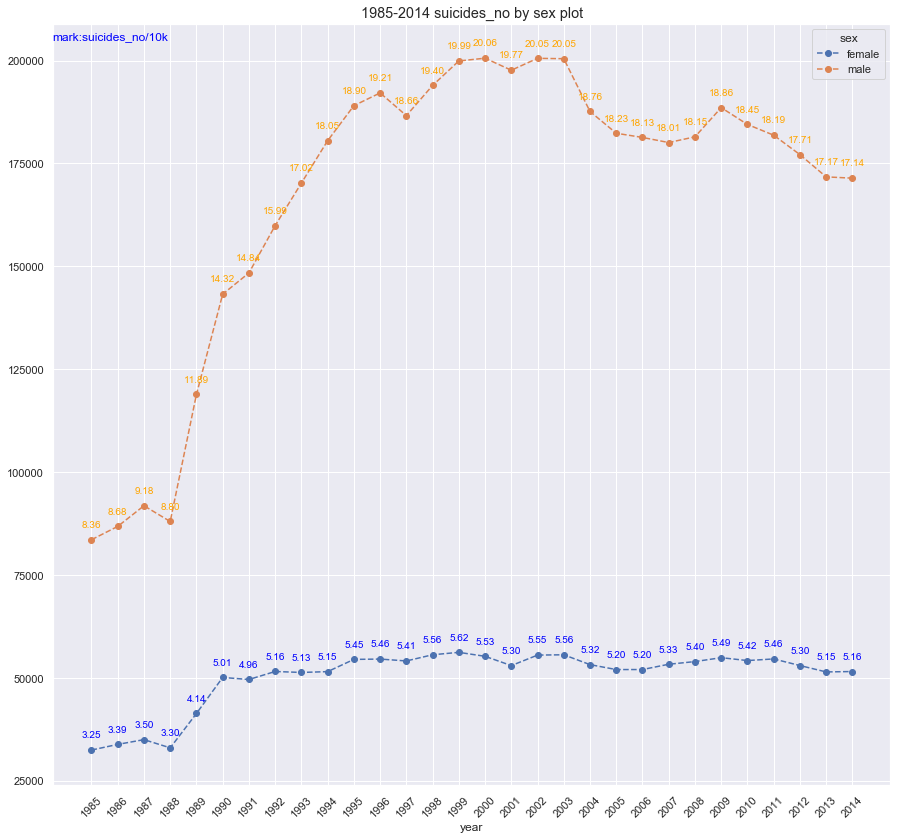

In [167]:
sns.set()
p2=sexPivot.plot(figsize=(15,14),linestyle='--',marker='o')
p2.get_figure()
plt.title(r'1985-2014 suicides_no by sex plot',fontsize='large')
plt.text(-1.5,205000,'mark:suicides_no/10k',color='blue')
plt.xticks(range(sexPivot.index.shape[0]),sexPivot.index,rotation=45)
x=np.arange(sexPivot.index.shape[0])
y1=np.array(sexPivot.loc[:,'female'])
y2=np.array(sexPivot.loc[:,'male'])
for i,j in zip(x,y1):
    plt.text(i,j+3000,'%1.2f'%round(j/10000,2),ha='center',color='blue',fontsize='small')
else:
    pass
for i,j in zip(x,y2):
    plt.text(i,j+3000,'%1.2f'%round(j/10000,2),ha='center',color='orange',fontsize='small')
else:
    pass
plt.savefig('./charts/total_by_gender_plot.png')
plt.show()

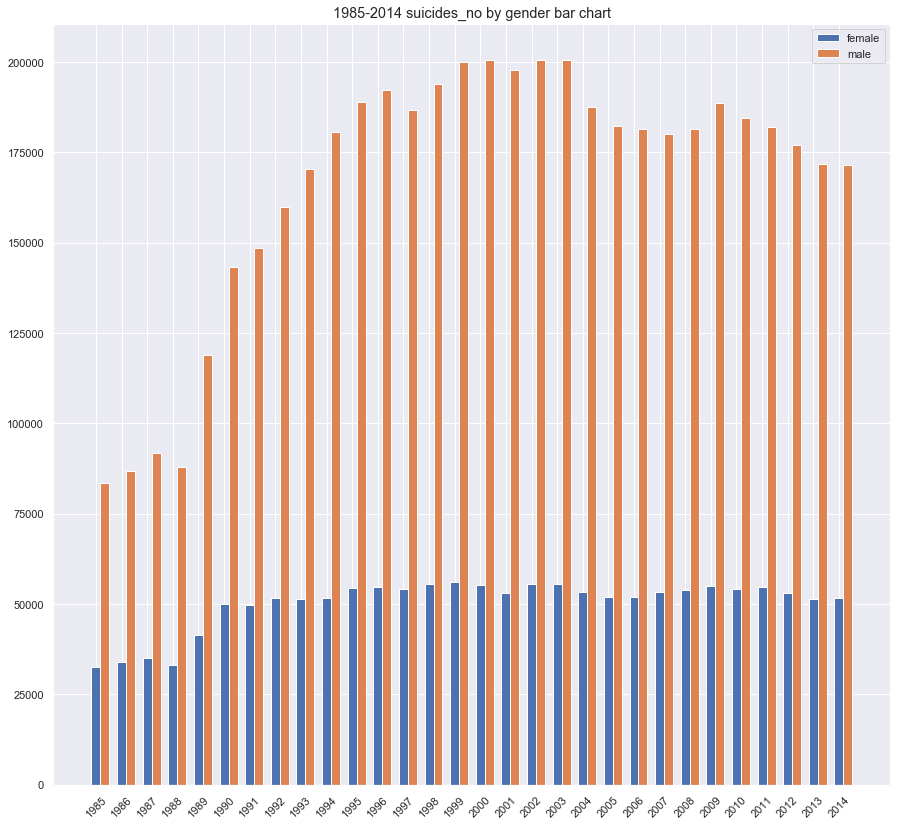

In [168]:
sns.set()
x=np.arange(sexPivot.index.shape[0])
y1=np.array(sexPivot.loc[:,'female'])
y2=np.array(sexPivot.loc[:,'male'])
width=0.35
p3=plt.figure(figsize=(15,14))
plt.title(r'1985-2014 suicides_no by gender bar chart',fontsize='large')
plt.bar(x,y1,width=width)
plt.bar(x+width,y2,width=width)
plt.xticks(x,sexPivot.index,rotation=45)
plt.legend(['female','male'])
plt.savefig('./charts/total_by_gender_bar_chart.png')
plt.show()

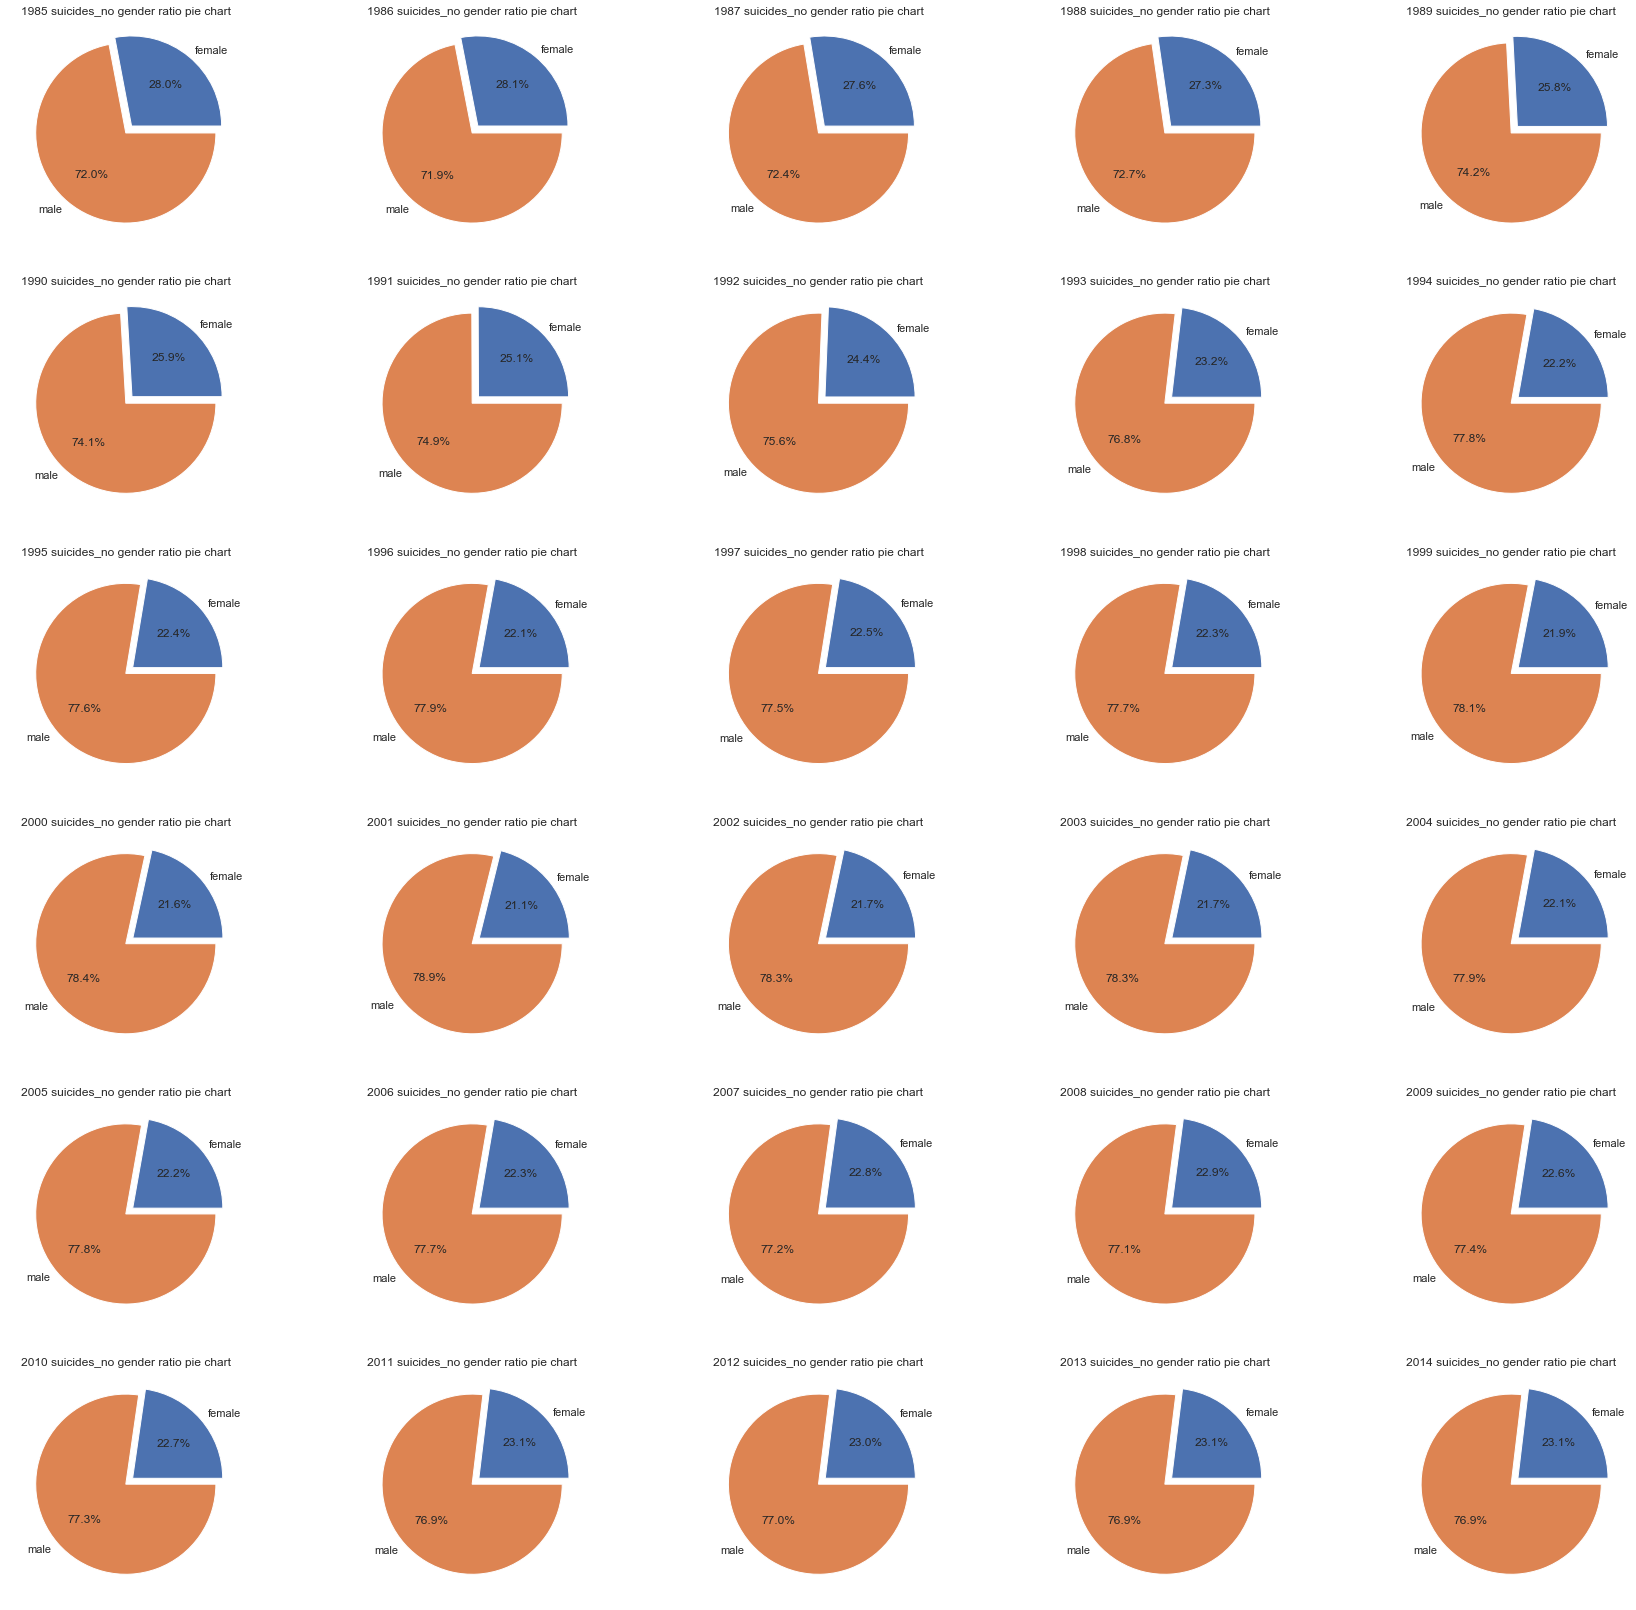

In [169]:
sns.set()
p4=plt.figure(figsize=(30,29))
explode=[0.1,0.0]
labels=['female','male']
for i in range(sexPivot.index.shape[0]):
    p4.add_subplot(6,5,i+1)
    plt.title(r'%s suicides_no gender ratio pie chart'%sexPivot.index[i])
    plt.pie(sexPivot.iloc[i,:],explode=explode,labels=labels,autopct='%1.1f%%')
else:
    pass
plt.savefig('./charts/gender_ratio_pie.png')
plt.show()

## Visualization-by age

In [170]:
agePivot=pd.pivot_table(original,index='year',columns='age',values='suicides_no',aggfunc=np.sum)
agePivot.drop(index=[2015,2016],inplace=True)

In [171]:
agePivot.index=agePivot.index.astype('str')
agePivot.tail()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2010,27684.0,38317.0,87364.0,1760.0,59743.0,23834.0
2011,27937.0,37936.0,85345.0,1879.0,59178.0,24209.0
2012,26280.0,36625.0,82482.0,1752.0,58443.0,24578.0
2013,24249.0,35068.0,80227.0,1806.0,57696.0,24153.0
2014,24028.0,35381.0,79132.0,1882.0,57696.0,24865.0


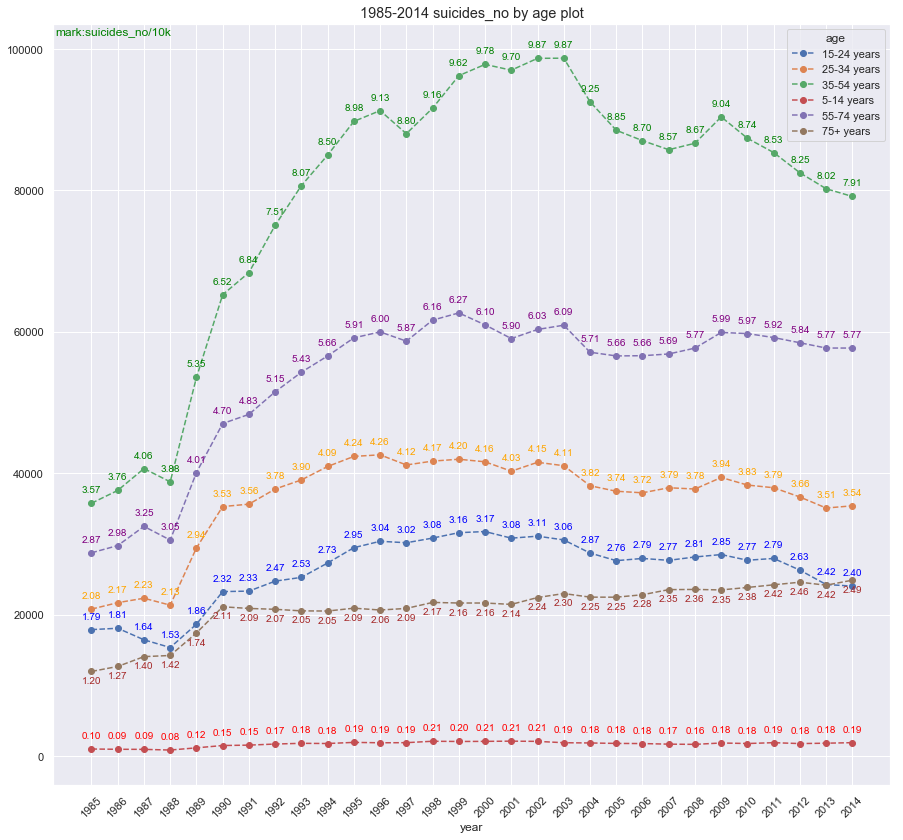

In [172]:
sns.set()
p5=agePivot.plot(figsize=(15,14),linestyle='--',marker='o')
p5.get_figure()
plt.title(r'1985-2014 suicides_no by age plot',fontsize='large')
plt.text(-1.4,102000,'mark:suicides_no/10k',color='green')
plt.xticks(range(agePivot.index.shape[0]),agePivot.index,rotation=45)
x=np.arange(agePivot.index.shape[0])
y1=np.array(agePivot.loc[:,'15-24 years'])
y2=np.array(agePivot.loc[:,'25-34 years'])
y3=np.array(agePivot.loc[:,'35-54 years'])
y4=np.array(agePivot.loc[:,'5-14 years'])
y5=np.array(agePivot.loc[:,'55-74 years'])
y6=np.array(agePivot.loc[:,'75+ years'])
name=np.array([y1,y2,y3,y4,y5,y6])
color=['blue','orange','green','red','purple','brown']
for i in range(len(name)-1):
    for k,l in zip(x,name[i]):
        plt.text(k,l+1500,'%1.2f'%round(l/10000,2),ha='center',fontsize='small',color=color[i])
    else:
        pass
else:
    for k,l in zip(x,y6):
        plt.text(k,l-1700,'%1.2f'%round(l/10000,2),ha='center',fontsize='small',color='brown')
plt.savefig('./charts/total_by_age_plot.png')
plt.show()

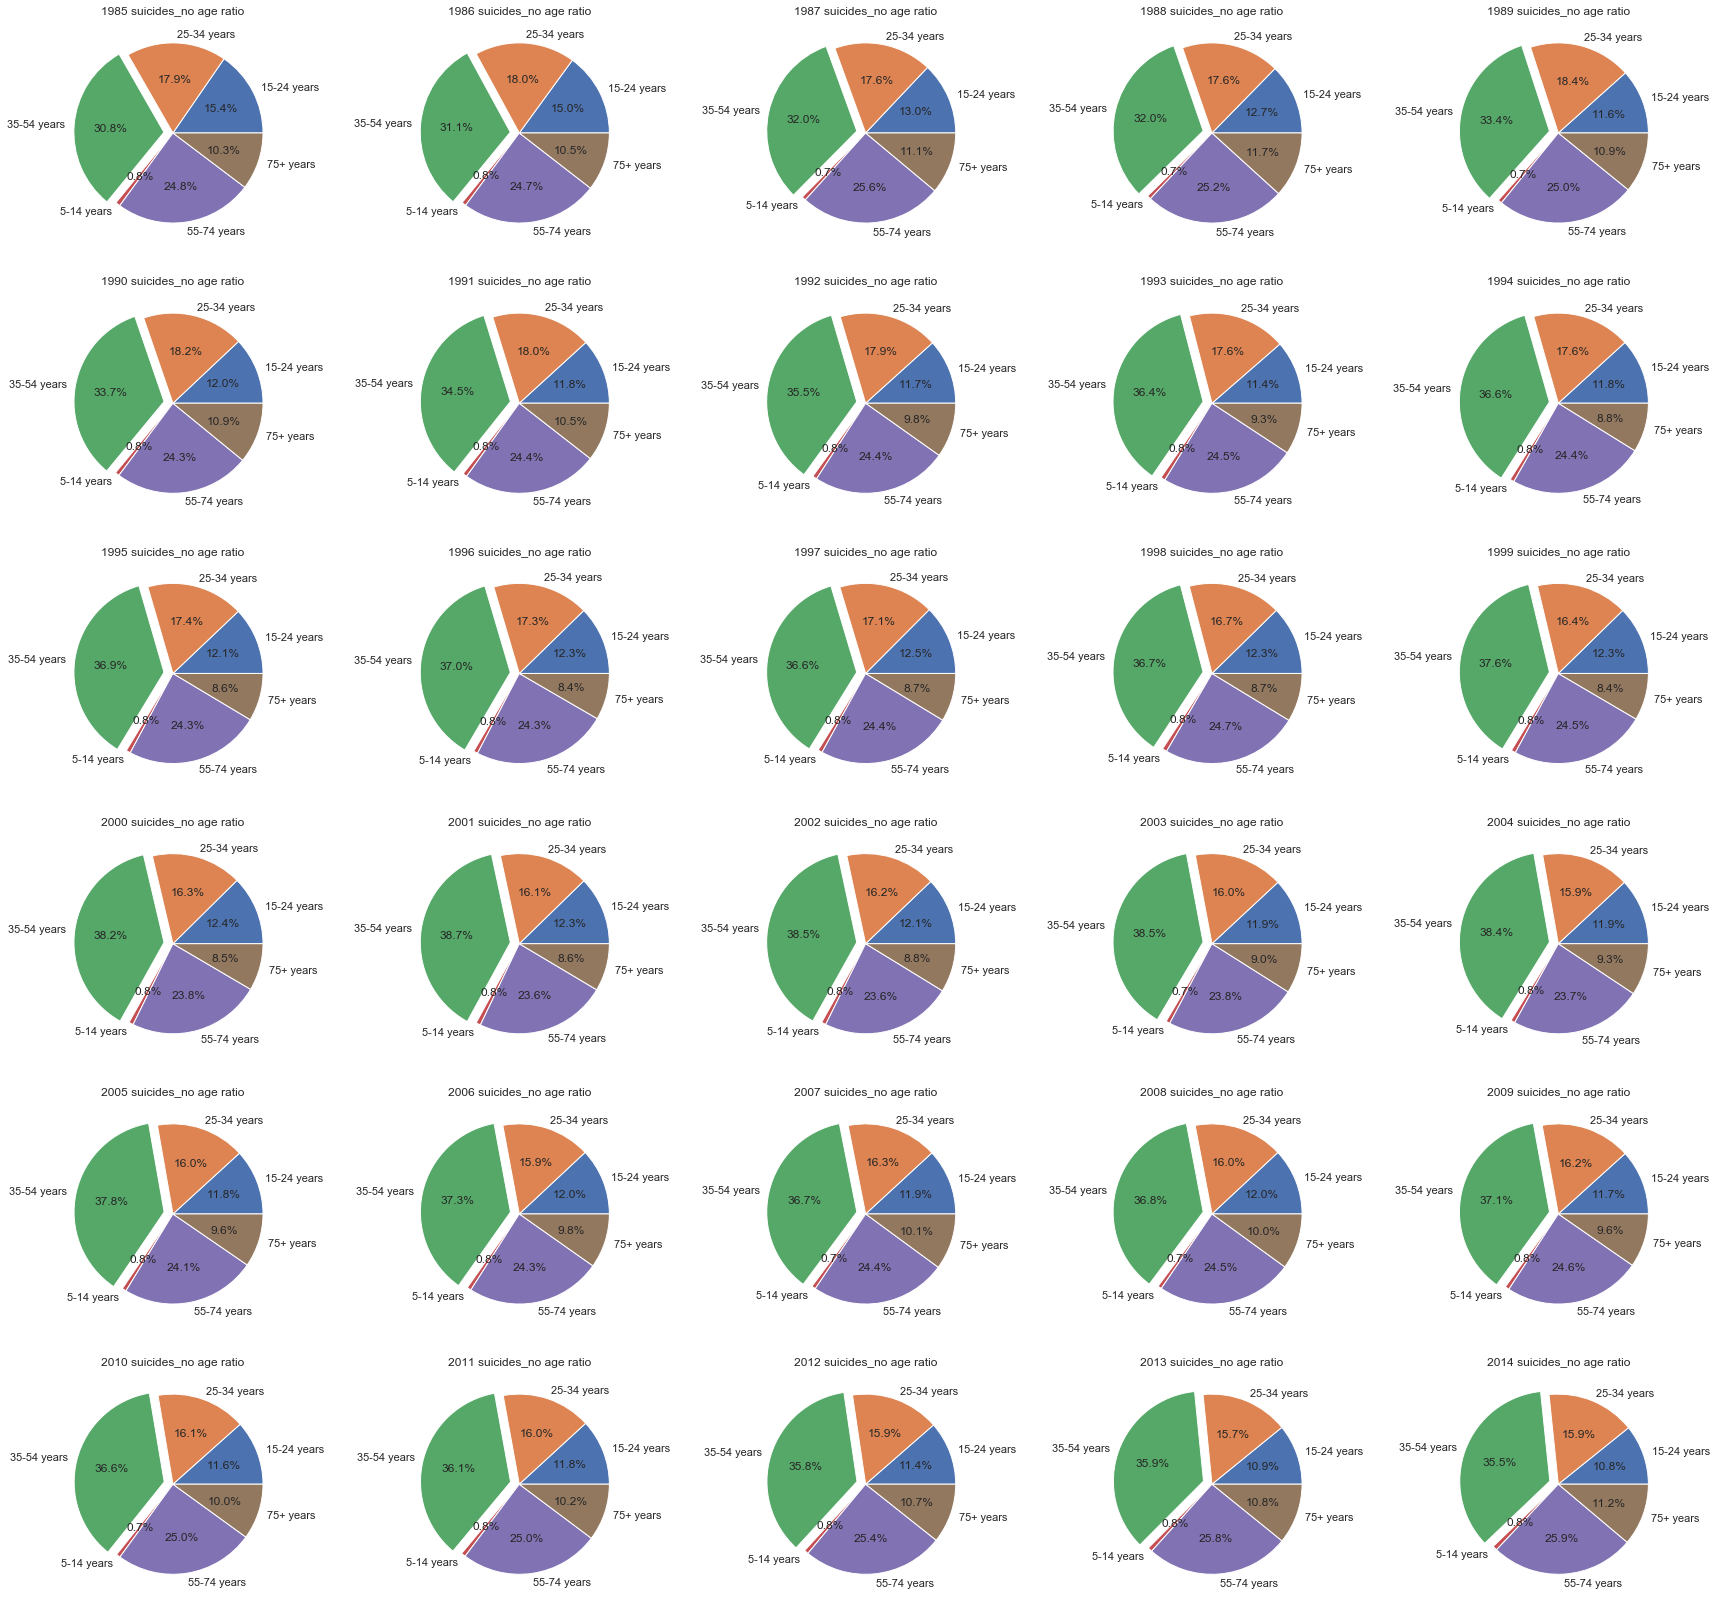

In [173]:
sns.set()
explode=[0.0,0.0,0.1,0.0,0.0,0.0]
label=agePivot.columns
p6=plt.figure(figsize=(30,29))
for i in range(agePivot.index.shape[0]):
    p6.add_subplot(6,5,i+1)
    plt.title('%s suicides_no age ratio'%agePivot.index[i])
    plt.pie(agePivot.iloc[i,:],explode=explode,labels=label,autopct='%1.1f%%')
else:
    pass
plt.savefig('./charts/total_age_ratio_pie.png')
plt.show()

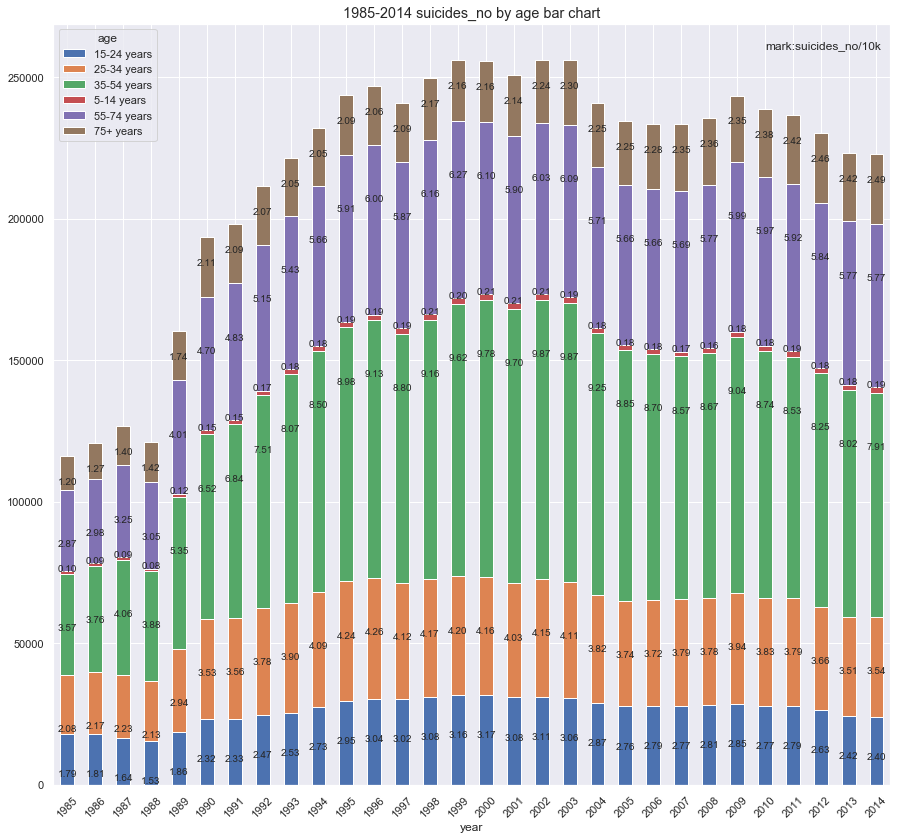

In [174]:
sns.set()
p7=agePivot.plot.bar(figsize=(15,14),stacked=True)
p7.get_figure()
plt.title(r'1985-2014 suicides_no by age bar chart',fontsize='large')
plt.text(25,260000,'mark:suicides_no/10k')
plt.xticks(range(agePivot.index.shape[0]),agePivot.index,rotation=45)
name=np.array([y1,y2,y3,y4,y5,y6])
color=['blue','orange','green','red','purple','brown']
dis=20000
for i in range(len(name)):
    for k,l,z,q,w,r,t in zip(x,name[i],name[i-1],name[i-2],name[i-3],name[i-4],name[i-5]):
        if i==0:
            plt.text(k,l-dis+5000,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
        elif i==1:
            plt.text(k,l+z-dis,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
        elif i==2:
            plt.text(k,l+z+q-dis,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
        elif i==3:
            plt.text(k,l+z+q+w,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
        elif i==4:
            plt.text(k,l+z+q+w+r-dis,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
        else:
            plt.text(k,l+z+q+w+r+t-dis+10000,'%1.2f'%round(l/10000,2),ha='center',fontsize='small')
    else:
        pass
else:
    pass
plt.savefig('./charts/total_by_age_bar.png')
plt.show()

## Scatter-correlation

In [175]:
original.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [176]:
original.max()

country                   Uzbekistan
year                            2016
sex                             male
age                        75+ years
suicides_no                    22338
population                  43805214
suicides/100k pop             224.97
country-year          Uzbekistan2014
HDI for year                   0.944
 gdp_for_year ($)     18120714000000
gdp_per_capita ($)            126352
generation                    Silent
dtype: object

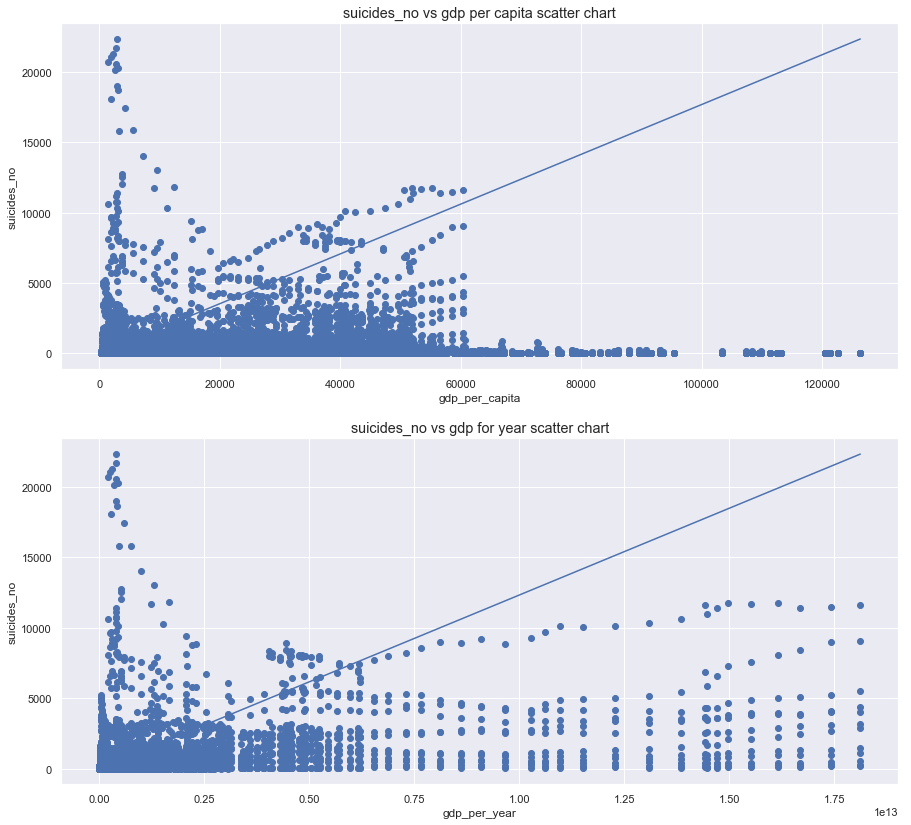

In [177]:
p8=plt.figure(figsize=(15,14))
p8.add_subplot(2,1,1)
plt.scatter(original['gdp_per_capita ($)'],original['suicides_no'])
x=np.linspace(0,original['gdp_per_capita ($)'].max(),200)
y=np.linspace(0,original['suicides_no'].max(),200)
plt.plot(x,y)
plt.title(r'suicides_no vs gdp per capita scatter chart',fontsize='large')
plt.xlabel('gdp_per_capita')
plt.ylabel('suicides_no')
p8.add_subplot(2,1,2)
plt.scatter(original[' gdp_for_year ($) '],original['suicides_no'])
x=np.linspace(0,original[' gdp_for_year ($) '].max(),200)
y=np.linspace(0,original['suicides_no'].max(),200)
plt.plot(x,y)
plt.title(r'suicides_no vs gdp for year scatter chart',fontsize='large')
plt.xlabel('gdp_per_year')
plt.ylabel('suicides_no')

plt.savefig('./charts/suicides_gdp_scatter.png')
plt.show()

## correlation-pearson matrix

In [178]:
pearsonMatrix=pd.DataFrame(round(data.corr(method='pearson'),4))
pearsonMatrix.sort_values(by='suicides_no',ascending=False)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
suicides_no,0.1186,-0.0045,0.1446,1.0000,0.6162,0.3066,0.1159,0.4301,0.0613,-0.0706
population,0.1589,0.0089,-0.0112,0.6162,1.0000,0.0083,0.1033,0.7107,0.0815,-0.0680
gdp_for_year ($),0.1636,0.0945,-0.0000,0.4301,0.7107,0.0252,0.2979,1.0000,0.3034,0.0213
suicides/100k pop,0.0552,-0.0390,0.3915,0.3066,0.0083,1.0000,0.1090,0.0252,0.0018,-0.0498
sex,-0.0000,0.0000,1.0000,0.1446,-0.0112,0.3915,0.0000,-0.0000,0.0000,-0.0000
country,1.0000,0.0228,-0.0000,0.1186,0.1589,0.0552,-0.0069,0.1636,0.0533,0.0061
HDI for year,-0.0069,0.1347,0.0000,0.1159,0.1033,0.1090,1.0000,0.2979,0.7204,0.0282
gdp_per_capita ($),0.0533,0.3391,0.0000,0.0613,0.0815,0.0018,0.7204,0.3034,1.0000,0.0829
year,0.0228,1.0000,0.0000,-0.0045,0.0089,-0.0390,0.1347,0.0945,0.3391,0.2683
generation,0.0061,0.2683,-0.0000,-0.0706,-0.0680,-0.0498,0.0282,0.0213,0.0829,1.0000


## Predict--with population predict formula

With data that is total by year,using population predict formula,

and using previous population for basic period.

### population predict formula:

$${M_n}={M_0}*{(1+V)}^n$$

${M_n}$=predicted period.

${M_0}$=basic period.

V=Growth rate

n=year value


### growth rate formula:

$$\frac{{a_i}-{a_{i-1}}}{a_{i-1}}$$

In [179]:
yearSum.tail()

,suicides_no,population,suicides_rate(%)
year,,,
2010,238702,1997297329,0.0120
2011,236484,1993362332,0.0119
2012,230160,1912812088,0.0120
2013,223199,1890161710,0.0118
2014,222984,1912057309,0.0117


In [180]:
def formula(data):
    srate=(data.iloc[-1,0]-data.iloc[-2,0])/data.iloc[-2,0]
    suicide=data.iloc[-1,0]*(1+srate)
    prate=(data.iloc[-1,1]-data.iloc[-2,1])/data.iloc[-2,1]
    population=data.iloc[-1,1]*(1+prate)
    rate=(suicide/population)*100
    x=pd.DataFrame([suicide,population,rate])
    x=x.T
    x=x.rename(columns={0:'suicides_no',
                       1:'population',
                       2:'suicides_rate(%)'})
    year=str(int(data.index[-1])+1)
    x=x.rename(index={0:year})
    return x

In [181]:
year2015=formula(yearSum)
yearSum=pd.concat([yearSum,year2015])
year2016=formula(yearSum)
yearSum=pd.concat([yearSum,year2016])
year2017=formula(yearSum)
yearSum=pd.concat([yearSum,year2017])
year2018=formula(yearSum)
yearSum=pd.concat([yearSum,year2018])
year2019=formula(yearSum)
yearSum=pd.concat([yearSum,year2019])
year2020=formula(yearSum)
yearSum=pd.concat([yearSum,year2020])
year2021=formula(yearSum)
yearSum=pd.concat([yearSum,year2021])
year2022=formula(yearSum)
yearSum=pd.concat([yearSum,year2022])
year2023=formula(yearSum)
yearSum=pd.concat([yearSum,year2023])
year2024=formula(yearSum)
yearSum=pd.concat([yearSum,year2024])
year2025=formula(yearSum)
yearSum=pd.concat([yearSum,year2025])

In [184]:
yearSum.tail()

,suicides_no,population,suicides_rate(%)
2021,221484.787703,2.072595e+09,0.010686
2022,221271.438945,2.096604e+09,0.010554
2023,221058.295699,2.120891e+09,0.010423
2024,220845.357767,2.145460e+09,0.010294
2025,220632.624950,2.170313e+09,0.010166


## Visualization-predict

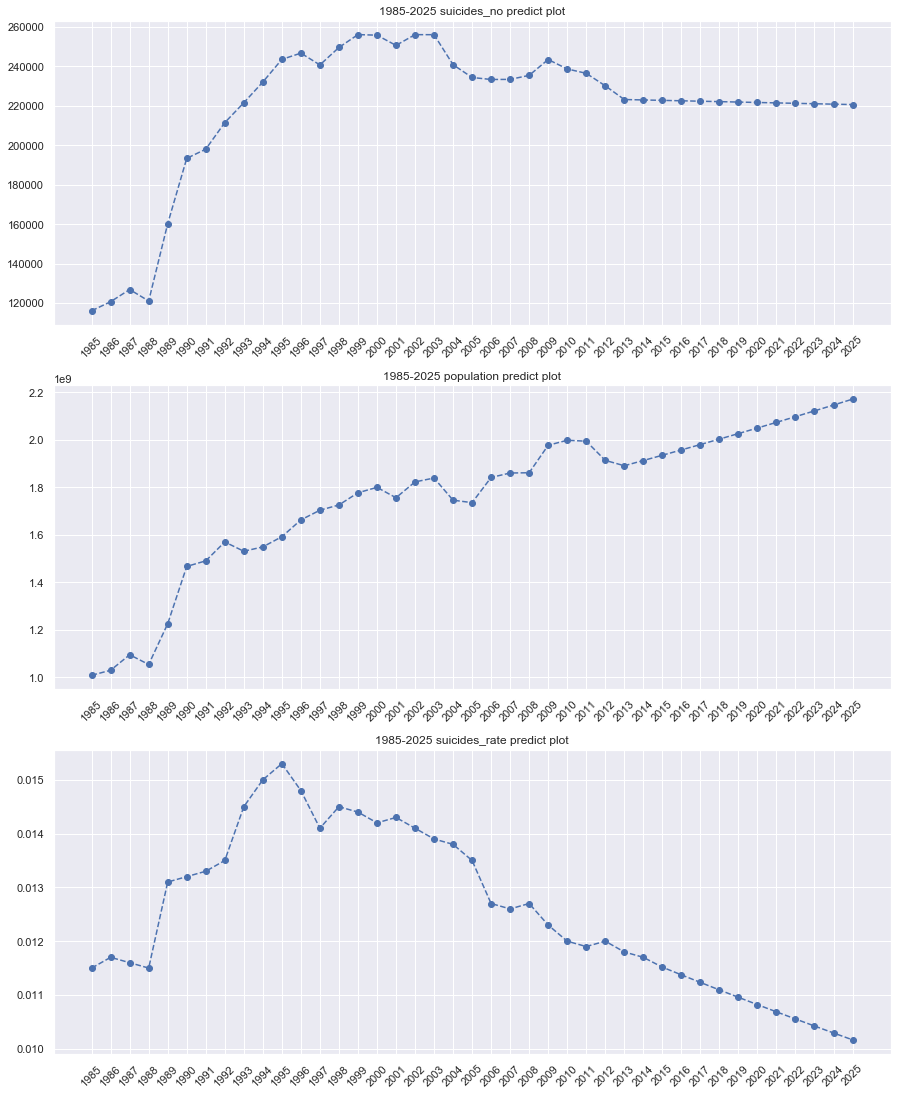

In [183]:
p9=plt.figure(figsize=(15,19))
p9.add_subplot(3,1,1)
yearSum.loc[:,'suicides_no'].plot(linestyle='--',marker='o')
plt.title('1985-2025 suicides_no predict plot')
plt.xticks(range(yearSum.index.shape[0]),yearSum.index,rotation=45)
p9.add_subplot(3,1,2)
yearSum.loc[:,'population'].plot(linestyle='--',marker='o')
plt.title('1985-2025 population predict plot')
plt.xticks(range(yearSum.index.shape[0]),yearSum.index,rotation=45)
p9.add_subplot(3,1,3)
yearSum.loc[:,'suicides_rate(%)'].plot(linestyle='--',marker='o')
plt.title('1985-2025 suicides_rate predict plot')
plt.xticks(range(yearSum.index.shape[0]),yearSum.index,rotation=45)

plt.savefig('./charts/suicides_predict_plot.png')
plt.show()